# Programming Exercise 1: Linear Regression

In this exercise, you will implement linear regression and get to see it work on data. 

## 1. Linear regression with one variable

In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

You would like to use this data to help you select which city to expand to next.

The file `ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

Before starting on any task, it is often useful to understand the data by visualizing it. 

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
# Read the data
data = pd.read_csv('ex1data1.txt', header=None)
x = data.iloc[:, 0].values
y = data.iloc[:, 1].values

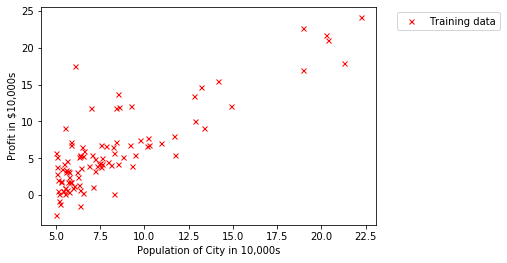

In [42]:
# Plot the data
plt.plot(x, y, 'rx', ms=5, label='Training data')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

An implementation of the gradient descent algorithm is in the function `grad_desc` in the file `grad_desc.py`.

In [4]:
# Import gradient descent
from grad_desc import grad_desc

This function receives:

- grad: Callable of the gradient of the function to be minimized.
- x0: Initial guess.
- alpha: Learning rate.
- save_steps: Whether to save the gradient descent steps or not.
- grad_tol: Early stoping tolerance criterion for the gradient.
- max_iter: Maximum number of iterations.

In [5]:
# Import libraries
import numpy as np

In [13]:
# Cost and cost gradient
X = np.concatenate([np.array([x**i]).T for i in range(2)], axis=1)
def cost(theta, X, y):
    m = len(y)
    return np.linalg.norm(X.dot(theta) - y)**2 / (2 * m)
def cost_grad(theta, X, y):
    m = len(y)
    return X.T.dot(X.dot(theta) - y) / m

In [38]:
# Gradient descent
solution = grad_desc(grad=cost_grad,
                     x0=np.zeros(2),
                     args=(X, y),
                     alpha=0.01,
                     grad_tol=1e-3,
                     max_iter=1e5,
                     save_steps=False)

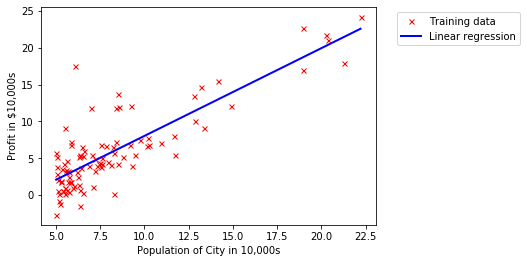

In [43]:
# Plot the data
plt.plot(x, y, 'rx', ms=5, label='Training data')
x_fit = np.sort(x)
X_fit = np.concatenate([np.array([x_fit**i]).T for i in range(2)], axis=1)
y_fit = X_fit.dot(solution)
plt.plot(x_fit, y_fit, 'b', lw=2, label='Linear regression')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

Your final values for $\theta$ will also be used to make predictions on profits in areas of 35,000 and 70,000 people. 

In [46]:
solution

array([-3.89026346,  1.19247936])

In [49]:
predict1 = 10000 * np.array([1, 3.5]).dot(solution)
predict2 = 10000 * np.array([1, 7]).dot(solution)
predict1, predict2

(2834.142967226789, 44570.92056738741)

## 2. Linear regression with multiple variables

In this part, you will implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file `ex1data2.txt` contains a training set of housing prices in Portland, Oregon. The first column is the sizeof the house (in square feet), the second column is the number of bedrooms, and the third column is the price
of the house.

In [52]:
# Read the data
data = pd.read_csv('ex1data2.txt', header=None)
X = data.iloc[:, 0:2].values
y = data.iloc[:, 2].values

In [51]:
# First 10 example data
data.columns = ['Size', 'Number of bedrooms', 'Price']
data.head(10)

,Size,Number of bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


First let's normalize the features:

In [57]:
mu = X.mean(axis=0)
sigma = X.std(axis=0, ddof=1)
X_norm = (X - mu) / sigma

Now, let's add the intercept $x_0=1$

In [60]:
m = len(y)
X = np.concatenate((np.ones((m, 1)), X_norm), axis=1)

We're ready to run the gradient descent algorithm:

In [61]:
# Cost and cost gradient
def cost(theta, X, y):
    m = len(y)
    return np.linalg.norm(X.dot(theta) - y)**2 / (2 * m)
def cost_grad(theta, X, y):
    m = len(y)
    return X.T.dot(X.dot(theta) - y) / m

In [67]:
# Gradient descent
solution = grad_desc(grad=cost_grad,
                     x0=np.zeros(3),
                     args=(X, y),
                     alpha=0.01,
                     grad_tol=1e-3,
                     max_iter=1e5,
                     save_steps=False)

In [68]:
solution

array([340412.65957447, 110631.04864092,  -6649.47263289])

With this, let's estimate the price of a $1650 ft^2$, $3$ bedrooms house:

In [74]:
X_p = (np.array([1650, 3] - mu) / sigma)
estimated_price = np.concatenate((np.ones((1, 1)), np.array([X_p])), axis=1).dot(solution)
estimated_price

array([293081.4646913])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>